# Descargar noticias de un medio digital

En esta práctica vamos a descargar los titulares de las noticias de un medio de comunicación digital

## Importar las librerías que necesitaremos

Vamos a utilizar urllib3 y Beautiful Soup

In [86]:
#!/usr/bin/env python

import urllib3, nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import json

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librerías básicas
import numpy as np
import pandas as pd

# Expresión regular
import re


## Descargar la página

Emplearemos un UserAgent (navegador) de móvil para identificarnos con la página

Al tener los medios de comunicación en un archivo json aparte realizo la carga del fichero y introduzco las urls en un diccionario

In [69]:
filename = 'urls.json'
with open(filename) as f:
        # Cargar su contenido y crear un diccionario
        dic_urls = json.load(f)
dic_urls

{'20min': {'url': 'http://20minutos.es'},
 'elpais': {'url': 'http://www.elpais.com'},
 'elmundo': {'url': 'http://www.elmundo.es'},
 'lavoz': {'url': 'http://www.lavozdegalicia.es'}}

Se elige cualquier medio digital de las urls

In [93]:

url = dic_urls['20min']['url']

manager = urllib3.PoolManager()
response = manager.request('GET', url)
content = response.data.decode('utf-8')

titulos = re.findall(r"<h1><a>(.*?)</a></h1>", content)
titulos = [titulo.text() for titulo in titulos]

print(titulos)

#ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
#h = {"User-Agent": ua}
#
#def descargar_pagina(dic_urls):
#    http = urllib3.PoolManager()
#    r = http.request('GET', dic_urls['20min']['url'], fields=None, headers=h)
#    return r
#
#r = descargar_pagina(dic_urls)
##type(r)
#print(r.headers)


[]


## Quitar código HTML

In [76]:
sopa = BeautifulSoup(r.data, "html.parser")
web_solotexto = sopa.get_text()

salida = ''
#excluirlineas=4

for linea in web_solotexto.split('\n'):
    aux=linea.strip()
    if aux and len(aux) > 50:
        salida += aux + '\n'
        #if not aux.startswith('Comentarios ('):
        #    excluirlineas=excluirlineas-1
        #    if (excluirlineas < 0):
        #        vartext2 = vartext2 + aux + '\n'

print (salida)

#Otra forma, quizás más elegante:
titulares = sopa.find_all('h4')

for titular in titulares:
    print(titular.get_text().strip())

20minutos.es | Diario abierto | Última hora, local, España y el mundo
HUELGA DE TRENESLos sindicatos llegan a un acuerdo in extremis y desconvocan la huelga
El cierre de la lista de rehenes y prisioneros retrasa la tregua entre Israel y Hamás, que se espera que empiece mañana
Hizbulá ataca Israel con 48 cohetes, la mayor ofensiva desde el inicio de la guerraSigue en directo la última hora y todas las claves del conflictoSánchez apoya ante Abbas que la Autoridad Palestina  asuma el control de Gaza
Campo se abstiene de debatir la amnistía en el TC porque siendo ministro dijo que era "inconstitucional"
Díez, Pumpido, Campo... Así está compuesto el Constitucional que decidirá sobre la amnistía
Desconvocada la huelga de trenes: los sindicatos y el Ministerio alcanzan un acuerdo 'in extremis'
Investigadores de OpenAI alertaron de "un poderoso descubrimiento" de IA que amenazaba a la humanidad
Enviaron una carta a la dirección dos día antes del despido de Sam Altman.Quienes son los rostros de

> Para quitar el texto de una noticia de 'El Mundo'

In [37]:

web_solotexto = BeautifulSoup(r.data).get_text()

def elmundo_noticia(web_solotexto):
    salida = ''
    contador = 0
    excluirlineas=6
    vartext2 = ''

    for linea in web_solotexto.split('\n'):
        contador += 1
        aux=linea.strip()
        if aux and len(aux) > 50:
            salida += aux + '\n'
            if not aux.startswith('Comentarios ('):
                excluirlineas=excluirlineas-1
                if (excluirlineas < 0):
                    vartext2 = vartext2 + aux + '\n'

    lista_lineas = vartext2.split('\n')
    texto_noticia = lista_lineas[0][5:]
    return texto_noticia


texto = elmundo_noticia(web_solotexto)


**Limpeza do texto**

In [40]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [43]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [44]:
#Reemplazamos signos de puntuación por "":

for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

clean_texto



'presidente gobierno afea ejecutivo netanyahu respuesta tras ataque hamas debe implicar muerte gente inocente gazasánchez apela terrorismo eta advertir israel éste combatirse solo fuerzadirecto guerra israel gaza última hora viaje oficial prensa hebrea calienta visita sánchez ministros anti israelíes increíble vaya reunirse familias secuestrados pedro sánchez comenzado visita israel palestina escenario comienzo tregua retrasado viernes israel seguido bombardeando gaza últimas horas primera cita viaje visitará israel gaza egipto sido encuentro presidente israel isaac herzog presidente gobierno comentarios públicos reunión puerta cerrada advertido israel debe cumplir ley internacional recordando experiencia españa eta advirtió terrorismo erradicarse solo uso fuerzaespaña mantenido misma posición inicio israel derecho defenderse debe hacerlo respetando derecho humanitario internacional sánchez celebrado tregua comienza viernes si bien españa partidaria alto fuego establesánchez acompañado

### Creación de la lista de palabras

In [45]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

palabras

['presidente',
 'gobierno',
 'afea',
 'ejecutivo',
 'netanyahu',
 'respuesta',
 'tras',
 'ataque',
 'hamas',
 'debe',
 'implicar',
 'muerte',
 'gente',
 'inocente',
 'gazasánchez',
 'apela',
 'terrorismo',
 'eta',
 'advertir',
 'israel',
 'éste',
 'combatirse',
 'solo',
 'fuerzadirecto',
 'guerra',
 'israel',
 'gaza',
 'última',
 'hora',
 'viaje',
 'oficial',
 'prensa',
 'hebrea',
 'calienta',
 'visita',
 'sánchez',
 'ministros',
 'anti',
 'israelíes',
 'increíble',
 'vaya',
 'reunirse',
 'familias',
 'secuestrados',
 'pedro',
 'sánchez',
 'comenzado',
 'visita',
 'israel',
 'palestina',
 'escenario',
 'comienzo',
 'tregua',
 'retrasado',
 'viernes',
 'israel',
 'seguido',
 'bombardeando',
 'gaza',
 'últimas',
 'horas',
 'primera',
 'cita',
 'viaje',
 'visitará',
 'israel',
 'gaza',
 'egipto',
 'sido',
 'encuentro',
 'presidente',
 'israel',
 'isaac',
 'herzog',
 'presidente',
 'gobierno',
 'comentarios',
 'públicos',
 'reunión',
 'puerta',
 'cerrada',
 'advertido',
 'israel',
 'debe',

**Contaxe de palabras**

In [46]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        # Va sumando el número de veces que se repite la palabra
        word_count[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        word_count[palabra]=[1]

word_count

{'presidente': [10],
 'gobierno': [6],
 'afea': [1],
 'ejecutivo': [3],
 'netanyahu': [4],
 'respuesta': [3],
 'tras': [3],
 'ataque': [2],
 'hamas': [5],
 'debe': [4],
 'implicar': [2],
 'muerte': [2],
 'gente': [3],
 'inocente': [2],
 'gazasánchez': [1],
 'apela': [1],
 'terrorismo': [5],
 'eta': [2],
 'advertir': [1],
 'israel': [17],
 'éste': [1],
 'combatirse': [1],
 'solo': [3],
 'fuerzadirecto': [1],
 'guerra': [2],
 'gaza': [7],
 'última': [1],
 'hora': [2],
 'viaje': [3],
 'oficial': [1],
 'prensa': [1],
 'hebrea': [1],
 'calienta': [1],
 'visita': [3],
 'sánchez': [6],
 'ministros': [1],
 'anti': [1],
 'israelíes': [1],
 'increíble': [1],
 'vaya': [1],
 'reunirse': [1],
 'familias': [2],
 'secuestrados': [2],
 'pedro': [1],
 'comenzado': [1],
 'palestina': [3],
 'escenario': [1],
 'comienzo': [1],
 'tregua': [2],
 'retrasado': [1],
 'viernes': [2],
 'seguido': [1],
 'bombardeando': [1],
 'últimas': [1],
 'horas': [3],
 'primera': [3],
 'cita': [2],
 'visitará': [1],
 'egipto'

In [47]:
#Generamos el DF y lo ordenamos:
df = pd.DataFrame.from_dict(word_count).transpose() # transpose = CAMBIAR
df


,0
presidente,10
gobierno,6
afea,1
ejecutivo,3
netanyahu,4
...,...
destacando,1
importancia,1
ver,1
enlaces,1


**Mostrar gráfica de ocorrencias das palabras**

In [48]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

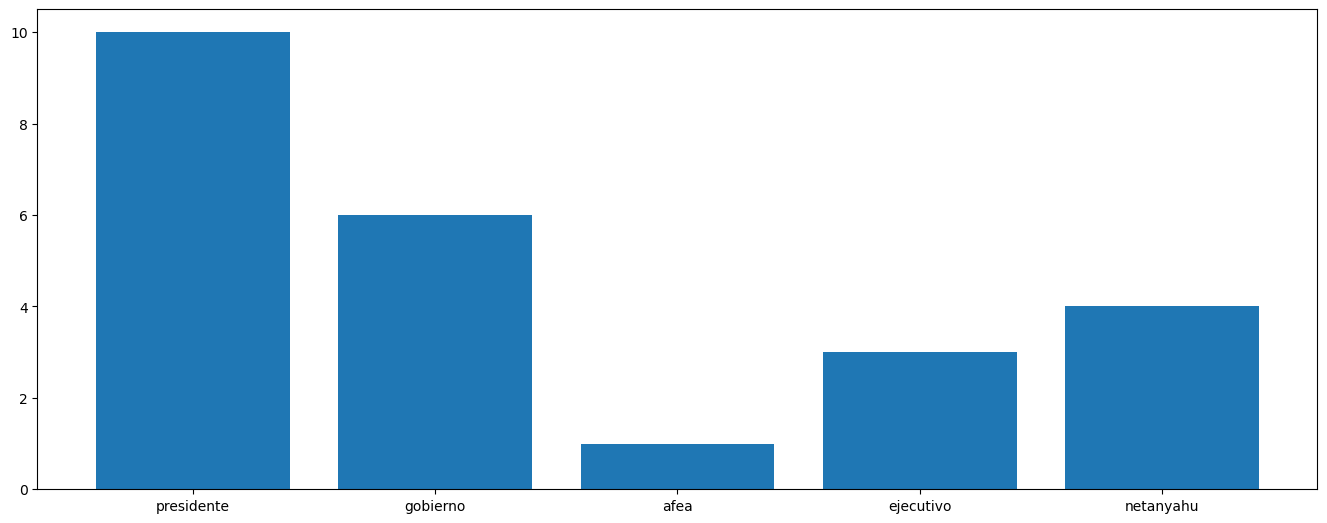

In [49]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

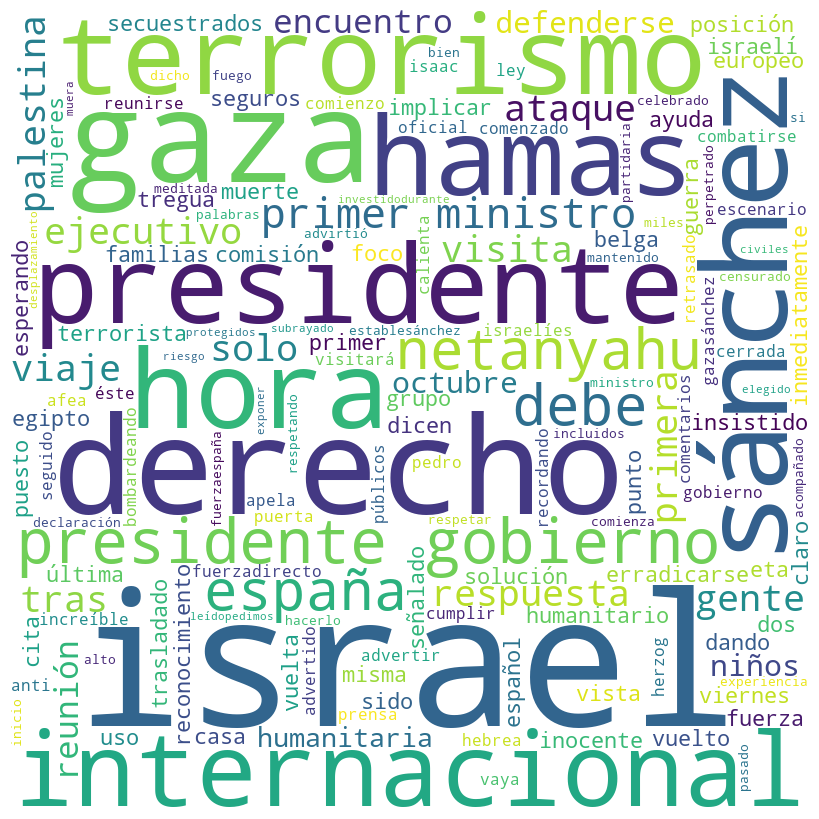

In [52]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)


word_cloud.to_file("C:\\Users\\daniel.martinezcarre\\Downloads\\nube_ampliacion_1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()